In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import numpy as np
import pickle
import sentencepiece as spm
from tqdm import tqdm

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.57', '1.5.0')

In [4]:
!nvidia-smi

Sat May  9 16:34:47 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:01:00.0  On |                  N/A |
|  0%   58C    P2    58W / 250W |    485MiB / 11177MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [5]:
torch.cuda.set_device(0)

In [6]:
!pwd

/home/gaurav/PycharmProjects/code-mixed/language_model


In [7]:
path = Path('/home/gaurav/PycharmProjects/code-mixed/language_model')

In [8]:
from inltk.tokenizer import HinglishTokenizer, handle_all_caps, handle_upper_case_first_letter

In [9]:
# def handle_all_caps(t: str) -> str:
#     tokens = t.split()
#     tokens = replace_all_caps(tokens)
#     return ' '.join(tokens)

# def handle_upper_case_first_letter(t: str) -> str:
#     tokens = t.split()
#     tokens = deal_caps(tokens)
#     return ' '.join(tokens)

In [10]:
# class HinglishTokenizer(BaseTokenizer):
#     def __init__(self, lang:str):
#         self.lang = lang
#         self.sp = spm.SentencePieceProcessor()
#         self.sp.Load(str(path/"../tokenizer/hinglish_spm.model"))
        
#     def tokenizer(self, t:str) -> List[str]:
#         return self.sp.EncodeAsPieces(t)

In [11]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/hinglish_spm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(60000)]

In [12]:
len(itos)

60000

In [13]:
itos[:20]

['xxunk',
 'xxbos',
 'xxeos',
 'xxpad',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.',
 '▁the',
 ',',
 '▁ke',
 '▁he',
 '▁main',
 '▁of',
 '▁in',
 '▁kii',
 '▁to',
 '▁is']

In [14]:
# 60,000 is the vocab size that we chose in sentencepiece
hinglish_vocab = Vocab(itos)

In [15]:
tokenizer = Tokenizer(lang='hien', tok_func=HinglishTokenizer)

In [16]:
tokenizer.pre_rules.append(handle_all_caps)
tokenizer.pre_rules.append(handle_upper_case_first_letter)

In [17]:
tokenizer.special_cases, tokenizer.pre_rules, tokenizer.post_rules

(['xxunk',
  'xxpad',
  'xxbos',
  'xxeos',
  'xxfld',
  'xxmaj',
  'xxup',
  'xxrep',
  'xxwrep'],
 [<function fastai.text.transform.fix_html(x:str) -> str>,
  <function fastai.text.transform.replace_rep(t:str) -> str>,
  <function fastai.text.transform.replace_wrep(t:str) -> str>,
  <function fastai.text.transform.spec_add_spaces(t:str) -> str>,
  <function fastai.text.transform.rm_useless_spaces(t:str) -> str>,
  <function inltk.tokenizer.handle_all_caps(t:str) -> str>,
  <function inltk.tokenizer.handle_upper_case_first_letter(t:str) -> str>],
 [<function fastai.text.transform.replace_all_caps(x:Collection[str]) -> Collection[str]>,
  <function fastai.text.transform.deal_caps(x:Collection[str]) -> Collection[str]>])

In [18]:
# tokenize externally because of RAM problems

In [19]:
# def get_tokens_from_file(filepath) -> List[str]:
#     text = open_text(filepath)
#     return tokenizer.process_all([text])[0]

In [20]:
# base_dir = Path('/home/gaurav/PycharmProjects/code-mixed/language_model/data')

# src_dir = base_dir / 'train'
# files = src_dir.ls()
# for file in tqdm(files):
#     gc.collect()
#     trn_tokens = get_tokens_from_file(file)
#     filename = str(file).split('/')[-1]
#     with open(base_dir/f'trn_tokens/{filename}.pkl', 'wb') as f:
#         pickle.dump(trn_tokens, f)
# #     break


    
# src_dir = base_dir / 'valid'
# files = src_dir.ls()
# for file in tqdm(files):
#     gc.collect()
#     val_tokens = get_tokens_from_file(file)
#     filename = str(file).split('/')[-1]
#     with open(base_dir/f'val_tokens/{filename}.pkl', 'wb') as f:
#         pickle.dump(val_tokens, f)
# #     break



In [21]:
tokens = tokenizer.process_all(['Tell me about TOUR self, mujhe jaanna hai'])

In [22]:
''.join(tokens[0])

'▁xxmaj▁tell▁me▁about▁xxup▁tour▁self,▁mujhe▁jaanna▁hai'

In [23]:
path

PosixPath('/home/gaurav/PycharmProjects/code-mixed/language_model')

In [24]:
trn_files = [str(file) for file in (path/'data'/'trn_tokens').ls()]
trn_files.sort()
val_files = [str(file) for file in (path/'data'/'val_tokens').ls()]
val_files.sort()
print(len(trn_files), len(val_files))

4198 3156


In [25]:
num_processor = NumericalizeProcessor(vocab=hinglish_vocab)

In [26]:
sp.encode_as_ids('▁xxmaj▁tell▁me▁about▁xxup▁tour▁self,▁mujhe▁jaanna▁hai')

[33, 5, 619, 357, 119, 33, 6, 2263, 4294, 11, 480, 1511, 1333, 32]

In [27]:
num_processor.process_one(tokens[0])

array([  33,    5,  619,  357,  119,   33,    6, 2263, 4294,   11,  480, 1511, 1333,   32])

In [28]:
trn_ids = []
for file in tqdm(trn_files):
    with open(file, 'rb') as f:
        trn_tokens = pickle.load(f)
    trn_ids.append(num_processor.process_one(trn_tokens))

100%|██████████| 4198/4198 [02:29<00:00, 28.07it/s]


In [29]:
val_ids = []
for file in tqdm(val_files):
    with open(file, 'rb') as f:
        val_tokens = pickle.load(f)
        val_ids.append(num_processor.process_one(val_tokens))
print(len(val_ids))

100%|██████████| 3156/3156 [00:45<00:00, 68.96it/s]

3156


In [30]:
for ids in trn_ids[:10]:
    print(len(ids))

131038
143625
130420
138297
179156
148526
131233
138060
132048
133012


In [31]:
for ids in val_ids[:10]:
    print(len(ids))

45115
44294
49315
40019
46006
44874
46398
42167
44112
47782


In [32]:
print(len(trn_ids), len(val_ids))

4198 3156


In [33]:
data_lm = TextLMDataBunch.from_ids(path=path/'data', train_ids=trn_ids , valid_ids=val_ids, vocab=hinglish_vocab, bs=96)

In [34]:
data_lm.batch_size

96

In [35]:
# data_lm.save()

In [36]:
data_lm.show_batch()

idx,text
0,"▁chaahate ▁hai ▁entrens ▁pariksha ▁main ▁kisi ▁bhi ▁tarah ▁kii ▁pareshaani ▁na ▁ho . ▁ xxmaj ▁for ▁this , ▁you ▁must ▁know ▁these ▁12 ▁important ▁things ▁first . ▁- ▁neet ▁kii ▁pravesh ▁pariksha ▁ke ▁liye ▁ummidavaar ▁online ▁registration ▁9 ▁march ▁2018 ▁tak ▁kar ▁sakate ▁hai . ▁ xxup ▁neet -2018 ▁exam ▁notification ▁will ▁be ▁released , ▁exam ▁will ▁be ▁held ▁on ▁ xxmaj ▁may ▁6 ▁- ▁ xxmaj ▁candidates ▁can ▁submit"
1,"▁olympics . ▁iske ▁saath ▁hi ▁video ▁main ▁trump ▁par ▁un ▁baton ▁ko ▁lekar ▁kataaksh ▁kiya ▁gaya ▁he ▁jiske ▁liye ▁vah ▁vivaadon ▁main ▁ghire ▁rahe . ▁ xxmaj ▁not ▁only ▁this , ▁the ▁presence ▁of ▁ xxmaj ▁indians ▁in ▁every ▁region ▁of ▁ xxmaj ▁america ▁has ▁also ▁been ▁pinch ed , ▁be ▁it ▁the ▁ xxup ▁ceo ▁position ▁of ▁ xxmaj ▁american ▁software ▁companies ▁or ▁ xxmaj ▁priyanka ▁ xxmaj ▁chopra"
2,"▁istife ▁se ▁khaali ▁hone ▁vaali ▁seat ▁par ▁do - teen ▁maheene ▁main ▁upachunaav ▁hona ▁tay ▁he . ▁ xxmaj ▁according ▁to ▁sources , ▁the ▁ xxup ▁bjp ▁does ▁not ▁want ▁to ▁destabilize ▁the ▁state ▁government ▁at ▁the ▁moment , ▁but ▁in ▁the ▁by - election ▁of ▁ xxmaj ▁rajya ▁ xxmaj ▁sabha ▁by ▁making ▁ xxmaj ▁satpal ▁ xxmaj ▁maharaj ▁a ▁candidate , ▁it ▁will ▁spoil ▁the ▁game ▁of ▁"
3,▁naa ▁hi ▁chunaav ▁ke ▁baad ▁koi ▁gathbandhan ▁hua ▁he . ▁ xxmaj ▁it ▁remains ▁to ▁be ▁seen ▁whether ▁the ▁hostility ▁caused ▁by ▁the ▁guest ▁house ▁scandal ▁in ▁the ▁ xxup ▁sp - bsp ▁changes . ▁upi ▁kii ▁raajnneeti ▁main ▁is ▁cond ▁ko ▁ guestaouse ▁cond ▁kaha ▁jaataa ▁he ▁or ▁ye ▁bharat ▁kii ▁raajnneeti ▁ke ▁maathe ▁par ▁kalank ▁he . ▁ xxmaj ▁mayawati ▁herself ▁started ▁calling ▁ xxmaj ▁brahma datta ▁
4,"▁ temba ▁bawuma , ▁quinton ▁de cac , ▁te yun is ▁di ▁bru en , ▁abi ▁di vil yrs , ▁dean ▁algar , ▁keshav ▁maharaj , ▁aden ▁markram , ▁morne ▁morkal , ▁kris ▁morris , ▁and il ▁fel uk va yo , ▁ varnon ▁philander , ▁ cagiso ▁rabada , ▁del ▁sten . ▁ xxmaj ▁on ▁ xxmaj ▁september ▁9, ▁the ▁ xxmaj ▁telecom ▁ xxmaj ▁department ▁ xxup ▁("


In [37]:
len(data_lm.train_dl)

84297

In [38]:
len(data_lm.valid_dl)

23918

In [39]:
len(data_lm.vocab.itos)

60000

In [40]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=False)

In [41]:
gc.collect()

0

In [42]:
learn.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(60000, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(60000, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=60000, bias=True)
    (output_dp): RNNDropout()
  )
)

In [43]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


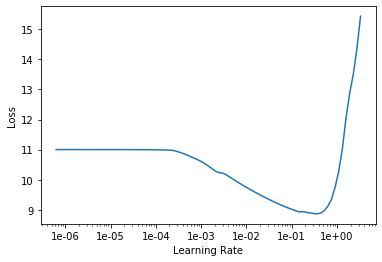

In [44]:
learn.recorder.plot()

In [45]:
learn.fit_one_cycle(10, 1e-2, callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='valid_loss', name='best_model')])

epoch,train_loss,valid_loss,accuracy,time
0,6.956141,7.456541,0.109333,8:25:49
1,3.892329,5.187357,0.274404,8:28:38
2,3.640175,5.071607,0.278485,8:29:54
3,3.484801,4.950999,0.288763,8:29:36
4,3.496101,4.898003,0.294362,8:28:20
5,3.363310,4.818655,0.298474,8:31:04
6,3.310468,4.711946,0.307213,8:33:19
7,3.263540,4.613399,0.313613,8:32:39
8,3.179731,4.509992,0.322672,8:32:48
9,3.170985,4.460629,0.326806,8:33:31


Better model found at epoch 0 with valid_loss value: 7.456540584564209.
Better model found at epoch 1 with valid_loss value: 5.187356948852539.
Better model found at epoch 2 with valid_loss value: 5.071606636047363.
Better model found at epoch 3 with valid_loss value: 4.9509992599487305.
Better model found at epoch 4 with valid_loss value: 4.898003101348877.
Better model found at epoch 5 with valid_loss value: 4.818655490875244.
Better model found at epoch 6 with valid_loss value: 4.711945533752441.
Better model found at epoch 7 with valid_loss value: 4.613399028778076.
Better model found at epoch 8 with valid_loss value: 4.509991645812988.
Better model found at epoch 9 with valid_loss value: 4.460628986358643.


In [48]:
TEXT = "jiske_liye_unhe"
N_WORDS = 40
N_SENTENCES = 2

In [49]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.9) for _ in range(N_SENTENCES)))

jiske_liye_unhe ▁ ▁or ▁the ▁ ▁ministry ▁has ▁chosen ▁ ▁point ▁ ▁one ▁for ▁electoral ▁gains . ▁ ▁priest ) ▁r ▁ ▁patil ▁has ▁been ▁appointed ▁as ▁ ▁NGO ▁ ▁chief ▁( ▁safal )
jiske_liye_unhe ▁ ▁remains ▁speculation , ▁not ▁a ▁statement , ▁but ▁the ▁question ▁is ▁again ▁that ▁the ▁ ▁maharashtra ▁ ▁state ▁ ▁congress ▁ ▁committee ▁ ▁( b pcc ) ▁has ▁lost ▁the ▁election . ▁adarsh


In [50]:
np.exp(4.46)

86.48750909632939

In [51]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [52]:
path

PosixPath('/home/gaurav/PycharmProjects/code-mixed/language_model')

In [36]:
# learn = load_learner(path / 'HindiDataset')

In [53]:
encoder = get_model(learn.model)[0]

In [54]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([60000, 400])

In [55]:
embeddings = encoder.state_dict()['encoder.weight']

In [56]:
embeddings = np.array(embeddings)

In [57]:
embeddings[0].shape

(400,)

In [58]:
df = pd.DataFrame(embeddings)

In [59]:
df.shape

(60000, 400)

In [60]:
df.to_csv('ulmfit_embeddings.tsv', sep='\t', index=False, header=False)

In [61]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,-0.741087,-0.311225,0.060546,-0.178954,-0.957294,-1.238322,-2.435595,0.140907,-1.877327,-1.094916,...,1.254112,-0.841178,-0.196198,0.065344,-0.214708,-0.184470,-0.052114,0.156518,0.079025,0.057311
1,-0.002919,-0.032116,-0.062614,-0.080859,-0.172717,-0.240557,-0.244994,-0.102237,0.113351,-1.658672,...,0.222872,-0.730414,-0.186458,0.058611,-0.068904,-0.072656,0.023373,0.067562,0.036825,0.326601
2,-0.002919,-0.032116,-0.062614,-0.080859,-0.172717,-0.240557,-0.244994,-0.102237,0.113351,-1.658672,...,0.222872,-0.730414,-0.186458,0.058611,-0.068904,-0.072656,0.023373,0.067562,0.036825,0.326601
3,-0.002919,-0.032116,-0.062614,-0.080859,-0.172717,-0.240557,-0.244994,-0.102237,0.113351,-1.658672,...,0.222872,-0.730414,-0.186458,0.058611,-0.068904,-0.072656,0.023373,0.067562,0.036825,0.326601
4,-0.002919,-0.032116,-0.062614,-0.080859,-0.172717,-0.240557,-0.244994,-0.102237,0.113351,-1.658672,...,0.222872,-0.730414,-0.186458,0.058611,-0.068904,-0.072656,0.023373,0.067562,0.036825,0.326601


In [62]:
df.shape

(60000, 400)

In [63]:
len(itos)

60000

In [64]:
df2 = pd.DataFrame(itos)

In [65]:
df2.head()

,0
0,xxunk
1,xxbos
2,xxeos
3,xxpad
4,xxfld


In [66]:
df2.shape

(60000, 1)

In [67]:
df2.to_csv('ulmfit_embeddings_metadata.tsv', sep='\t', index=False, header=False)

In [68]:
encoder.state_dict()['encoder.weight'][1]

tensor([-2.9187e-03, -3.2116e-02, -6.2614e-02, -8.0859e-02, -1.7272e-01,
        -2.4056e-01, -2.4499e-01, -1.0224e-01,  1.1335e-01, -1.6587e+00,
         3.5573e-02,  4.1172e-01,  1.6680e-02, -9.7491e-02,  1.7124e-01,
        -8.9159e-03, -1.0163e-01, -1.0758e-01, -3.4962e-02, -8.1240e-03,
        -3.4925e-01,  1.8157e-01,  1.3469e-01,  7.3417e-02,  1.5573e-01,
        -3.7215e-02,  1.0590e-01, -4.9367e-01, -6.2671e-01, -3.9182e-02,
        -2.3398e-01, -1.3931e-02, -8.7924e-02,  2.4612e-01,  6.6885e-02,
         2.2967e-01, -2.5089e-02,  1.8445e-01,  7.1987e-02, -5.0538e-01,
        -1.3284e-01,  1.4533e+00, -4.8622e-02,  4.5638e-01,  7.8519e-03,
        -5.6188e-01, -6.3683e-02, -1.0952e-01, -8.5916e-02,  1.1065e-02,
        -6.2366e-02,  2.7871e-02,  3.9858e-02, -2.9767e-02,  7.5633e-02,
        -1.0337e-01,  3.1411e-01, -9.6026e-03,  6.5735e-03, -3.8106e-02,
         2.0342e-01,  5.0189e-02, -1.3507e-01, -1.0616e-01, -1.2663e-01,
         3.3877e-02,  5.1502e-01, -2.5867e-01, -2.7